<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

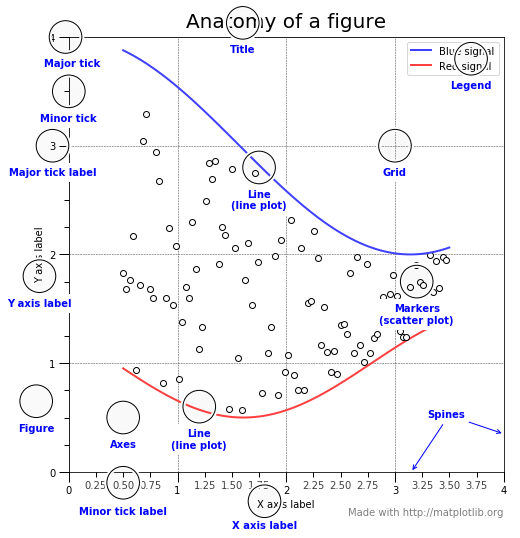

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

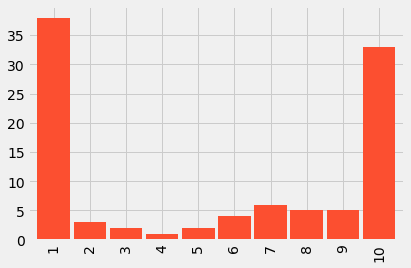

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

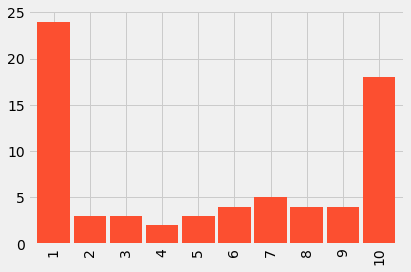

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

## Reproduce with real data

In [0]:
# Done 
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [0]:
### Assignment ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load our df and check the head
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

timestamp  respondents  ...   9_pct 10_pct
0  2017-07-17 12:28:32.785639          402  ...     5.0   33.6
1  2017-07-17 12:28:33.025600           78  ...     3.8   62.8
2  2017-07-17 12:28:33.273919            4  ...     0.0   25.0
3  2017-07-17 12:28:33.495325            4  ...     0.0   25.0
4  2017-07-17 12:28:33.722849          130  ...     4.6   49.2

[5 rows x 27 columns]

In [8]:
# See our timestamps are objects, we want datetime
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [9]:
# convert to datetime and check that it worked
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [10]:
df.set_index('timestamp', inplace=True)
df.head()

respondents        category   ...   9_pct  10_pct
timestamp                                                 ...                
2017-07-17 12:28:32.785639          402           Males   ...     5.0    33.6
2017-07-17 12:28:33.025600           78         Females   ...     3.8    62.8
2017-07-17 12:28:33.273919            4   Aged under 18   ...     0.0    25.0
2017-07-17 12:28:33.495325            4  Males under 18   ...     0.0    25.0
2017-07-17 12:28:33.722849          130      Aged 18-29   ...     4.6    49.2

[5 rows x 26 columns]

In [11]:
# new df of just the last day
last_day = df['2017-08-29']
last_day.tail()

respondents         category   ...   9_pct  10_pct
timestamp                                                  ...                
2017-08-29 23:10:05.369510            8       IMDb staff   ...    25.0    12.5
2017-08-29 23:10:05.598331           41  Top 1000 voters   ...     2.4    14.6
2017-08-29 23:10:05.794141          925         US users   ...     6.5    28.0
2017-08-29 23:10:06.022268          565     Non-US users   ...     6.2    36.1
2017-08-29 23:10:06.218251         2662       IMDb users   ...     5.5    33.7

[5 rows x 26 columns]

In [12]:
# Update df to just have IMDb users
last_day = last_day[last_day['category'] == 'IMDb users']
last_day.tail()

respondents    category   ...   9_pct  10_pct
timestamp                                             ...                
2017-08-29 22:30:06.423181         2662  IMDb users   ...     5.5    33.7
2017-08-29 22:40:06.233659         2662  IMDb users   ...     5.5    33.7
2017-08-29 22:50:06.592571         2662  IMDb users   ...     5.5    33.7
2017-08-29 23:00:05.829558         2662  IMDb users   ...     5.5    33.7
2017-08-29 23:10:06.218251         2662  IMDb users   ...     5.5    33.7

[5 rows x 26 columns]

In [13]:
# Just pull the last row
last_row = last_day.tail(1)
type(last_row)

pandas.core.frame.DataFrame

In [14]:
# Trim last row to just be percents column transposed for plotting
last_row_percents = last_row.loc[:,'1_pct':'10_pct'].T
last_row_percents

timestamp  2017-08-29 23:10:06.218251
1_pct                            38.4
2_pct                             2.6
3_pct                             1.4
4_pct                             0.9
5_pct                             2.1
6_pct                             4.1
7_pct                             5.8
8_pct                             5.5
9_pct                             5.5
10_pct                           33.7

In [0]:
# set index to rating numbers
last_row_percents.index = range(1,11)
last_row_percents.columns = ['Percent']

In [16]:
type(fake), type(last_row_percents)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

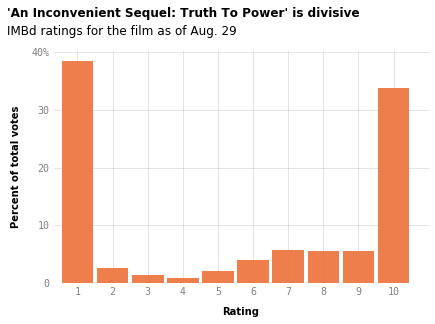

In [80]:
# Set style
plt.style.use('fivethirtyeight')

# create figure
fig = plt.figure(figsize=(6, 4))
fig.patch.set_facecolor('#FFFFFF')

# plot data
ax = last_row_percents['Percent'].plot.bar(color='#ed713a', width=0.9, legend=False, alpha = 0.9)

# Title and subtitle
ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth To Power' is divisive", color='black',  fontweight='demibold', fontsize=12)
ax.text(x=-2, y=43, s="IMBd ratings for the film as of Aug. 29", color='black', fontsize=12, fontweight='light', fontfamily='sans-serif')

# Change background to white
ax.set(facecolor='#FFFFFF')

# Set x and y labels
ax.set_xlabel('Rating', color='black', labelpad=10, fontsize=10, fontweight='heavy')
ax.set_ylabel('Percent of total votes', color='black', labelpad=10, fontsize=10, fontweight='heavy')

# Set y ticks range
ax.set_xticks(range(0, 11))
ax.set_yticks(range(0, 50, 10))

# Set x and y tick labels
ax.set_xticklabels(range(1,11), rotation=0, color='black', fontweight='light', fontsize=10, fontfamily='monospace', alpha=.5)
ax.set_yticklabels(['0', '10', '20', '30', '40%'], rotation=0, fontweight='light', color='black', fontsize=10, fontfamily='monospace', alpha=.5)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Make Gridlines softer
ax.grid(alpha=.5)

# Footer



plt.show()

In [18]:
6#compare to example
display(example)

In [19]:
pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.185
botocore==1.12.185
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.12
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.3
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [20]:
# CHange Pandas version
pip install pandas==0.23.4

In [21]:
### STRETCH ###

# Example I'm attempting to copy
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-bechdel-11.png?w=575'
example = Image(url=url, width=400)

display(example)

In [22]:
# Read in file
bechdel = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv')
bechdel.head()

year       imdb     ...     period code decade code
0  2013  tt1711425     ...             1.0         1.0
1  2012  tt1343727     ...             1.0         1.0
2  2013  tt2024544     ...             1.0         1.0
3  2013  tt1272878     ...             1.0         1.0
4  2013  tt0453562     ...             1.0         1.0

[5 rows x 15 columns]

In [23]:
bechdel['clean_test'].value_counts()

ok         803
notalk     514
men        194
dubious    142
nowomen    141
Name: clean_test, dtype: int64

In [24]:
bechdel.dtypes

year                int64
imdb               object
title              object
test               object
clean_test         object
binary             object
budget              int64
domgross          float64
intgross          float64
code               object
budget_2013$        int64
domgross_2013$    float64
intgross_2013$    float64
period code       float64
decade code       float64
dtype: object

In [0]:
bechdel['categorical_clean_test'] = bechdel['clean_test'].replace({'nowomen': 4, 'notalk': 3, 'men': 2, 'dubious': 1, 'ok': 0})

In [26]:
bechdel['categorical_clean_test'] = pd.to_numeric(bechdel['categorical_clean_test'])
bechdel.dtypes

year                        int64
imdb                       object
title                      object
test                       object
clean_test                 object
binary                     object
budget                      int64
domgross                  float64
intgross                  float64
code                       object
budget_2013$                int64
domgross_2013$            float64
intgross_2013$            float64
period code               float64
decade code               float64
categorical_clean_test      int64
dtype: object

In [27]:
year_bins = pd.cut(bechdel['year'], 9)
year_bins

0         (2008.222, 2013.0]
1         (2008.222, 2013.0]
2         (2008.222, 2013.0]
3         (2008.222, 2013.0]
4         (2008.222, 2013.0]
5         (2008.222, 2013.0]
6         (2008.222, 2013.0]
7         (2008.222, 2013.0]
8         (2008.222, 2013.0]
9         (2008.222, 2013.0]
10        (2008.222, 2013.0]
11        (2008.222, 2013.0]
12        (2008.222, 2013.0]
13        (2008.222, 2013.0]
14        (2008.222, 2013.0]
15        (2008.222, 2013.0]
16        (2008.222, 2013.0]
17        (2008.222, 2013.0]
18        (2008.222, 2013.0]
19        (2008.222, 2013.0]
20        (2008.222, 2013.0]
21        (2008.222, 2013.0]
22        (2008.222, 2013.0]
23        (2008.222, 2013.0]
24        (2008.222, 2013.0]
25        (2008.222, 2013.0]
26        (2008.222, 2013.0]
27        (2008.222, 2013.0]
28        (2008.222, 2013.0]
29        (2008.222, 2013.0]
                ...         
1764    (1974.778, 1979.556]
1765    (1974.778, 1979.556]
1766    (1974.778, 1979.556]
1767    (1974.

In [28]:
year_by_bechdel = pd.crosstab(year_bins, bechdel['categorical_clean_test'], normalize='index')
year_by_bechdel = year_by_bechdel * 100
year_by_bechdel

categorical_clean_test          0          1    ...              3          4
year                                            ...                          
(1969.957, 1974.778]    23.809524   0.000000    ...      61.904762   0.000000
(1974.778, 1979.556]    27.272727   6.060606    ...      42.424242  12.121212
(1979.556, 1984.333]    22.413793  15.517241    ...      27.586207  17.241379
(1984.333, 1989.111]    34.328358  10.447761    ...      31.343284  10.447761
(1989.111, 1993.889]    37.500000   7.812500    ...      23.437500  15.625000
(1993.889, 1998.667]    46.082949   5.529954    ...      33.640553   5.069124
(1998.667, 2003.444]    47.706422   6.727829    ...      27.522936   8.256881
(2003.444, 2008.222]    52.584270   6.966292    ...      24.943820   6.516854
(2008.222, 2013.0]      42.526690   9.608541    ...      28.647687   7.651246

[9 rows x 5 columns]

In [29]:
bechdel.head()

year       imdb          ...           decade code categorical_clean_test
0  2013  tt1711425          ...                   1.0                      3
1  2012  tt1343727          ...                   1.0                      0
2  2013  tt2024544          ...                   1.0                      3
3  2013  tt1272878          ...                   1.0                      3
4  2013  tt0453562          ...                   1.0                      2

[5 rows x 16 columns]

In [30]:
year_by_binary = pd.crosstab(year_bins, bechdel['binary'])
year_by_binary

binary                FAIL  PASS
year                            
(1969.957, 1974.778]    16     5
(1974.778, 1979.556]    24     9
(1979.556, 1984.333]    45    13
(1984.333, 1989.111]    44    23
(1989.111, 1993.889]    40    24
(1993.889, 1998.667]   117   100
(1998.667, 2003.444]   171   156
(2003.444, 2008.222]   211   234
(2008.222, 2013.0]     323   239

<Figure size 360x1080 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


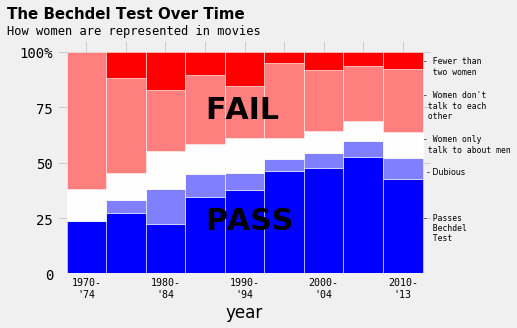

In [85]:
# ColorScheme
color = plt.cm.bwr


fig = plt.figure(figsize=(5, 15))

#fig.patch.set_visible(False)
# Stacked bar plot
ax = year_by_bechdel.plot.bar(stacked=True, legend=False, width=1, edgecolor='w',
                              cmap=color)
ax.step(bechdel['year'], (bechdel['binary'] == True))

# Title and Subtitle
ax.text(x=-2, y=115, s='The Bechdel Test Over Time', fontweight='bold', fontsize=15, fontname='Helvetica')
ax.text(x=-2, y=108, s='How women are represented in movies', fontsize=12, fontname='monospace')

# Right Text
ax.text(x=8.5, y=90, s='- Fewer than\n  two women', fontsize=8, fontname='monospace')
ax.text(x=8.5, y=70, s="- Women don't\n talk to each\n other", fontsize=8, fontname='monospace')
ax.text(x=8.5, y=55, s="- Women only\n talk to about men", fontsize=8, fontname='monospace')
ax.text(x=8.6, y=45, s="- Dubious", fontsize=8)
ax.text(x=8.5, y=15, s="- Passes\n  Bechdel\n  Test", fontsize=8, fontname='monospace')

# Overlay Text
ax.text(x=3, y=70, s='FAIL', fontweight='bold', fontsize=30)
ax.text(x=3, y=20, s='PASS', fontweight='bold', fontsize=30)
# y ticks
ax.set_yticks(range(0, 101, 25))
# Set x and y tick labels
ax.set_xticklabels(["1970-\n'74", ' ', "1980-\n'84", ' ', "1990-\n'94", ' ', "2000-\n'04", ' ', "2010-\n'13"], rotation=0, fontsize=10, fontname='monospace')
ax.set_yticklabels(['0', '25', '50', '75', '100%'], fontname='monospace')
plt.show()

In [32]:
display(example)